**Introduction**

Currently, There are many deep learning models that are used for Image classification. No doubt these models show a very impressive state of art accuracy and have become industry standards. However, prior to the deep learning boom, we still had many classical techiques for biomedical techniques for classification. Let us look at one such approach of classification with Bag of Visual Words


**What is Bag of Visual Words**

The concept of "Bag of Visual Words" is taken from the related "Bag of Word" concept of Natural Language Processing". 

In the bag of word model. The text is represented with frequency of its word without taking into account the order of the words (hence the name 'bag')

The main idea behind the counting the word is :

Documents that share a large number of the same keywords, regardless of the order the keywords appear in, are considered to be relevent to each other.

**Bag of Visual Words**

In Computer Vision, the same concept is used in the bag of visual words. Here instead of taking the word from the text,  image patches and their feature vectors are extracted from the image into a bag. Features vector is nothing but a unique pattern that we can find in an image.
To put it simply, Bag of Visual Word is nothing but representing an image as a collection of unordered image patches, as shown in the below illustration.

**What is the Feature?**
Basically, the feature of the image consists of keypoints and descriptors. Keypoints are the unique points in an image, and even if the image is rotated, shrink, or expand, its keypoints will always be the same. And descriptor is nothing but the description of the keypoint. The main task of a keypoint descriptor is to describe an interesting patch(keypoint)in an image.

**Image Classification with Bag of Visual Words**

This Image classification with Bag of Visual Words technique has three steps:

Feature Extraction – Determination of Image features of a given label.
Codebook Construction – Construction of visual vocabulary by clustering, followed by frequency analysis.
Classification – Classification of images based on vocabulary generated using SVM.
Let us go through each of the steps in detail.

**Feature Extraction**
The first step to build a bag of visual words is to perform feature extraction by extracting descriptors from each image in our dataset.

Feature representation methods deal with how to represent the patches as numerical vectors. These vectors are called feature descriptors.

A good descriptor should have the ability to handle the intensity, rotation, scale and affine variations to some extent.

One of the most famous descriptors is Scale-invariant feature transform (SIFT) and another one is ORB.

SIFT converts each patch to 128-dimensional vector. After this step, each image is a collection of vectors of the same dimension (128 for SIFT), where the order of different vectors is of no importance.



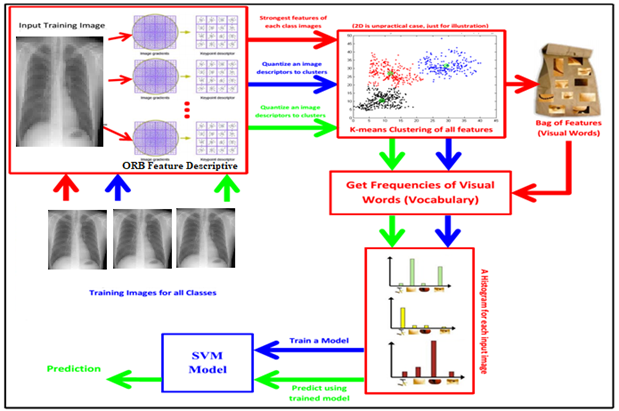



**Codewords and Codebook Construction**
The vectors generated in the feature extraction step above are now converted into the codewords which is similar to words in text documents. Codewords are nothing but vector representation of similar patches. This codeword also produces a codebook is similar to a word dictionary

This step normally accomplished via the k-means clustering algorithm. The outline of the K-Means clustering is shown below –

**Given k:**

Select initial centroids at random.
Assign each object to the cluster with the nearest centroid.
Compute each centroid as the mean of the objects assigned to it.
Repeat steps 2 and 3 until no change.
Some points to consider over here –

Clustering, which is an unsupervised learning method, is commonly used for creating visual vocabulary or codebook.
Each cluster center produced by k-means becomes a codeword.
The number of clusters is the codebook size.
Codebook can be learned on the separate training sets.
Provided the training set is sufficiently representative, the codebook will be “universal”.
The codebook is used for quantizing features. Quantization of features means that the Feature vector maps it to the index of the nearest codeword in a codebook.

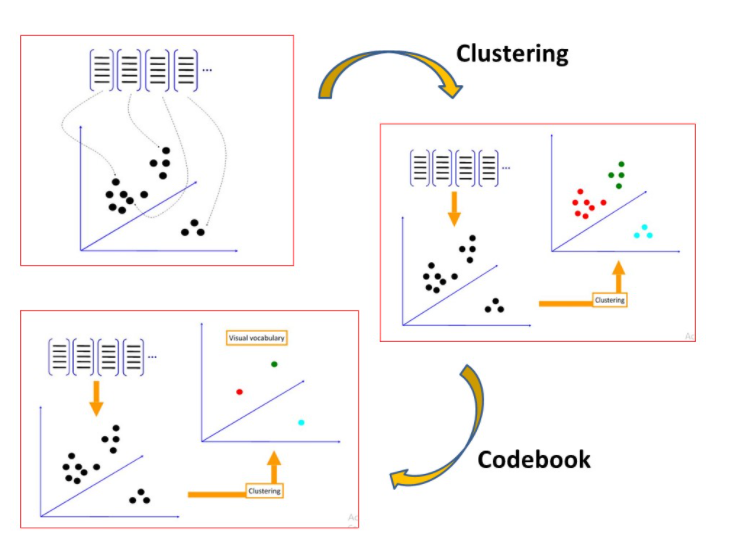

**Classification**
The next step consists of representing each image into a histogram of codewords.

It is done by first applying the keypoint detector or feature extractor and descriptor to every training image, and then matching every keypoint with those in the codebook.

The result of this is a histogram where the bins correspond to the codewords, and the count of every bin corresponds to the number of times the corresponding codeword matches a keypoint in the given image. In this way, an image can be represented by a histogram of codewords.

The histograms of the training images can then be used to learn a classification model. Here I am using SVM as a classification model.

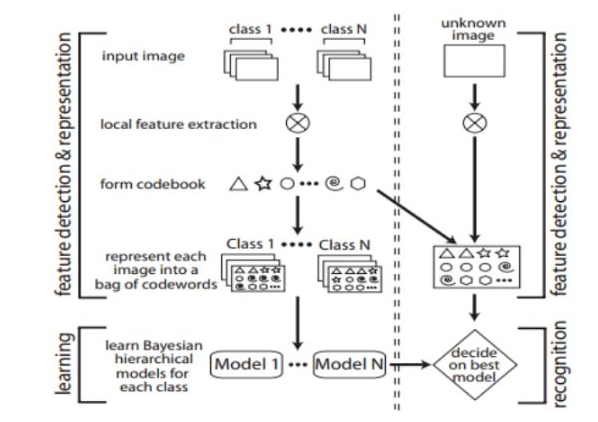

# Importing the required libraries

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score

# Defining the training path

In [3]:
train_path = "/Users/nanda/data/train"
class_names=os.listdir(train_path)
print("Training_Classes",class_names)

test_path = "/Users/nanda/data/test"
class_names_test = os.listdir(test_path)
print("Testing_Classes",class_names_test)

Training_Classes ['dogs', 'wolves']
Testing_Classes ['dogs', 'wolves']


# Create Image_paths and classes list 

In [4]:
image_paths_dog = []
image_paths_wolf = []
image_classes = []

image_test_paths_dog = []
image_test_paths_wolf = []
image_test_classes = []

# Function to List all the filenames in the directory

In [5]:
def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

In [6]:
for training_name in class_names:
    dir_=os.path.join(train_path,training_name)
    class_path=img_list(dir_)
    print(class_path)
    if training_name == 'dogs':
      image_paths_dog+=class_path
      print(image_paths_dog)
    if training_name == 'wolves':
      image_paths_wolf+=class_path
      print(image_paths_wolf)


<generator object img_list.<locals>.<genexpr> at 0x0000019552871120>
['/Users/nanda/data/train\\dogs\\n02085620_13964.jpg', '/Users/nanda/data/train\\dogs\\n02085620_1617.jpg', '/Users/nanda/data/train\\dogs\\n02085620_2204.jpg', '/Users/nanda/data/train\\dogs\\n02085620_2887.jpg', '/Users/nanda/data/train\\dogs\\n02085620_3409.jpg', '/Users/nanda/data/train\\dogs\\n02085620_3423.jpg', '/Users/nanda/data/train\\dogs\\n02085620_4207.jpg', '/Users/nanda/data/train\\dogs\\n02085620_588.jpg', '/Users/nanda/data/train\\dogs\\n02085620_8637.jpg', '/Users/nanda/data/train\\dogs\\n02085782_1600.jpg', '/Users/nanda/data/train\\dogs\\n02085782_1764.jpg', '/Users/nanda/data/train\\dogs\\n02085782_2269.jpg', '/Users/nanda/data/train\\dogs\\n02085782_3021.jpg', '/Users/nanda/data/train\\dogs\\n02085782_3899.jpg', '/Users/nanda/data/train\\dogs\\n02085936_10148.jpg', '/Users/nanda/data/train\\dogs\\n02085936_10297.jpg', '/Users/nanda/data/train\\dogs\\n02085936_10307.jpg', '/Users/nanda/data/train\\

In [7]:
len(image_paths_dog)

800

In [8]:
len(image_paths_wolf)

800

In [9]:
image_classes_0=[0]*(len(image_paths_dog))
print(image_classes_0)
print(len(image_classes_0))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [10]:
image_classes_1=[1]*(len(image_paths_wolf))
print(image_classes_1)
print(len(image_classes_1))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [11]:
image_classes=image_classes_0+image_classes_1
print(image_classes)
print(len(image_classes))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

**Testing_data**

In [12]:
for testing_name in class_names_test:
    if testing_name =='dogs':
      dir_=os.path.join(test_path,testing_name)
      class_test_paths=img_list(dir_)
      image_test_paths_dog+=class_test_paths
    if testing_name == 'wolves':
      dir_=os.path.join(test_path,testing_name)
      class_test_path=img_list(dir_)
      image_test_paths_wolf+=class_test_path


# Append all the image path and its corresponding labels in a list

In [13]:
D_dog = []
D_wolf = []

D_test_dog = []
D_test_wolf = []

In [14]:
for i in range(len(image_classes_0)):
    D_dog.append((image_paths_dog[i],image_classes_0[i]))

for i in range(len(image_classes_1)):
    D_wolf.append((image_paths_wolf[i],image_classes_1[i]))

In [15]:
D = []

D = D_dog+D_wolf

print(len(D))

1600


In [16]:
#Testing Image Path and its corresponding labels in a list 

image_test_classes_0=[0]*(len(image_test_paths_dog))
image_test_classes_1=[1]*(len(image_test_paths_wolf))
image_test_classes=image_classes_0+image_classes_1

for i in range(len(image_test_classes_0)):
    D_test_dog.append((image_test_paths_dog[i],image_test_classes_0[i]))

for i in range(len(image_test_classes_1)):
    D_test_wolf.append((image_test_paths_wolf[i],image_test_classes_1[i]))


D_test = D_test_dog + D_test_wolf

print(len(D_test))

400


**Shuffle Dataset and split into Training and Testing**

In [17]:
dataset_train = D
dataset_test = D_test
random.shuffle(dataset_train)
random.shuffle(dataset_test)
train = dataset_train
test = dataset_test

image_paths, y_train = zip(*train)
image_paths_test, y_test = zip(*test)

print(image_paths)
print(y_train)

print(image_paths_test)
print(y_test)

('/Users/nanda/data/train\\dogs\\n02107683_5751.jpg', '/Users/nanda/data/train\\dogs\\n02093859_2233.jpg', '/Users/nanda/data/train\\dogs\\n02088094_1370.jpg', '/Users/nanda/data/train\\dogs\\n02101388_10290.jpg', '/Users/nanda/data/train\\dogs\\n02105056_7291.jpg', '/Users/nanda/data/train\\wolves\\Img-5877.jpg', '/Users/nanda/data/train\\wolves\\wolf-2984865__480.jpg', '/Users/nanda/data/train\\dogs\\n02105505_3716.jpg', '/Users/nanda/data/train\\dogs\\n02110806_3903.jpg', '/Users/nanda/data/train\\wolves\\wolf-1350006__480.jpg', '/Users/nanda/data/train\\dogs\\n02108551_3522.jpg', '/Users/nanda/data/train\\wolves\\Img-9438.jpg', '/Users/nanda/data/train\\dogs\\n02088632_108.jpg', '/Users/nanda/data/train\\dogs\\n02111277_5955.jpg', '/Users/nanda/data/train\\dogs\\n02088238_9993.jpg', '/Users/nanda/data/train\\dogs\\n02102480_5442.jpg', '/Users/nanda/data/train\\wolves\\images74.jpg', '/Users/nanda/data/train\\wolves\\Img-12229.jpg', '/Users/nanda/data/train\\wolves\\images206.jpg', 

**Feature Extraction using ORB**

In [18]:
des_list = []

In [19]:
orb = cv2.ORB_create()

In [20]:
im = cv2.imread(image_paths[1])

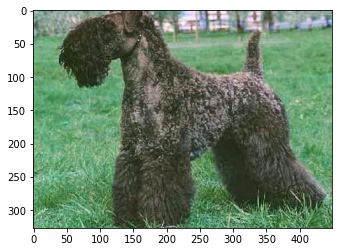

In [21]:
plt.imshow(im)

**Function for plotting keypoints**

In [22]:
def draw_keypoints(vis, keypoints, color = (0, 255, 0)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 4, color))

**Plotting the keypoints**

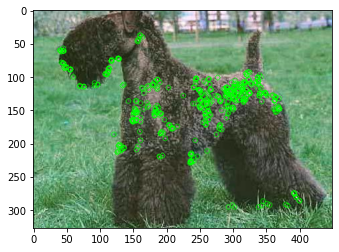

In [23]:
kp = orb.detect(im,None)
kp, des = orb.compute(im, kp)
img=draw_keypoints(im,kp)

**Appending descriptors of the training images in list**

In [24]:
for image_pat in image_paths:
    im=cv2.imread(image_pat)
    kp=orb.detect(im,None)
    keypoints,descriptor= orb.compute(im, kp)
    des_list.append((image_pat,descriptor))

In [25]:
descriptors=des_list[0][1]
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [26]:
descriptors.shape

(757850, 32)

In [27]:
descriptors_float=descriptors.astype(float)
print(len(descriptors_float))

757850


**Performing K Means clustering on Descriptors**

In [27]:
from scipy.cluster.vq import kmeans,vq

In [28]:
k=100
voc,variance=kmeans(descriptors_float,k,1)

**Creating histogram of training image**

In [29]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

In [30]:
#Applying standardisation on training feature
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

**Creating Classification Model with SVM**

In [32]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

LinearSVC(max_iter=80000)

**Testing the Classification Model**

In [33]:
des_list_test=[]

In [ ]:
for image_pat in image_paths_test:
    image=cv2.imread(image_pat)
    kp=orb.detect(image,None)
    keypoints_test,descriptor_test= orb.compute(image, kp)
    des_list_test.append((image_pat,descriptor_test))

In [ ]:
len(image_paths_test)

In [ ]:
from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

In [ ]:
test_features

In [ ]:
test_features=stdslr.transform(test_features)

**Evaluation of Trained model**

In [39]:
true_classes=[]
for i in y_test:
    if i==1:
        true_classes.append("wolves")
    else:
        true_classes.append("dogs")

In [40]:
predict_classes=[]
for i in clf.predict(test_features):
    if i==1:
        predict_classes.append("wolves")
    else:
        predict_classes.append("dogs")

In [41]:
clf.predict(test_features)

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,

In [42]:
accuracy=accuracy_score(true_classes,predict_classes)
print(accuracy)

0.6575


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true_classes,predict_classes)

array([[126,  74],
       [ 63, 137]], dtype=int64)

In [44]:
# Classification_report
from sklearn.metrics import classification_report
print(classification_report(true_classes,predict_classes))

              precision    recall  f1-score   support

        dogs       0.67      0.63      0.65       200
      wolves       0.65      0.69      0.67       200

    accuracy                           0.66       400
   macro avg       0.66      0.66      0.66       400
weighted avg       0.66      0.66      0.66       400

